In [1]:
! pwd

/home/ne25/Documents


In [2]:
import mdtraj

In [3]:
# !pip install --user prody

In [4]:
import glob
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pyemma
import mdtraj
import scipy.spatial.distance as sdist
import numpy as np
import prody
import itertools

In [5]:
#List simulation files
data=[]
param_files=glob.glob('/home/ne25/Downloads/Box_electrostatics_updated/Box_electrostatics/*param')
for param_file in param_files:
    #Add parameters
    with open(param_file) as param:
        values={}
        for line in param:
            if len(line)==0:
                continue
            line=line.strip().split(',')
            key=line[0]
            value=line[1]
            if key=='':
                continue
            values.update({key:value})
            root='.'.join(param_file.split('.')[:-1])
            values.update({'root':root})
    #Add files
    for extension in ['param','cif','pdb','dcd','log']:
        file_name=f'{root}.{extension}'
        if os.path.exists(file_name):
            values.update({extension:file_name})
    data+=[values]
    
simulations=pd.DataFrame(data)

simulations=simulations.reindex()
simulations=simulations.reset_index(drop=True)
simulations

,epsilon_ABP,root,epsilon_CAM,aligned,actinLen,repetition,disorder,box_size,n_actins,n_FAS,...,SLURM_WORKING_CLUSTER,SLURM_JOB_GID,test_run,date,name,job_id,param,cif,dcd,log
0,100,/home/ne25/Downloads/Box_electrostatics_update...,100,True,100,0,0,10000,20,200,...,nots:manager:6817:8704:101,2237,False,2023_06_30,Simulations_scratch/Box_electrostatics/Boxv1_0...,0,/home/ne25/Downloads/Box_electrostatics_update...,/home/ne25/Downloads/Box_electrostatics_update...,/home/ne25/Downloads/Box_electrostatics_update...,/home/ne25/Downloads/Box_electrostatics_update...
1,100,/home/ne25/Downloads/Box_electrostatics_update...,100,True,100,1,0,10000,20,200,...,nots:manager:6817:8704:101,2237,False,2023_07_01,Simulations_scratch/Box_electrostatics/Boxv1_0...,1,/home/ne25/Downloads/Box_electrostatics_update...,/home/ne25/Downloads/Box_electrostatics_update...,/home/ne25/Downloads/Box_electrostatics_update...,/home/ne25/Downloads/Box_electrostatics_update...
2,100,/home/ne25/Downloads/Box_electrostatics_update...,100,False,100,2,0,10000,20,200,...,nots:manager:6817:8704:101,2237,False,2023_07_03,Simulations_scratch/Box_electrostatics/Boxv1_0...,5,/home/ne25/Downloads/Box_electrostatics_update...,/home/ne25/Downloads/Box_electrostatics_update...,/home/ne25/Downloads/Box_electrostatics_update...,/home/ne25/Downloads/Box_electrostatics_update...
3,100,/home/ne25/Downloads/Box_electrostatics_update...,100,False,100,0,0,10000,20,200,...,nots:manager:6817:8704:101,2237,False,2023_07_01,Simulations_scratch/Box_electrostatics/Boxv1_0...,3,/home/ne25/Downloads/Box_electrostatics_update...,/home/ne25/Downloads/Box_electrostatics_update...,/home/ne25/Downloads/Box_electrostatics_update...,/home/ne25/Downloads/Box_electrostatics_update...
4,100,/home/ne25/Downloads/Box_electrostatics_update...,100,False,100,1,0,10000,20,200,...,nots:manager:6817:8704:101,2237,False,2023_07_03,Simulations_scratch/Box_electrostatics/Boxv1_0...,4,/home/ne25/Downloads/Box_electrostatics_update...,/home/ne25/Downloads/Box_electrostatics_update...,/home/ne25/Downloads/Box_electrostatics_update...,/home/ne25/Downloads/Box_electrostatics_update...
5,100,/home/ne25/Downloads/Box_electrostatics_update...,100,True,100,2,0,10000,20,200,...,nots:manager:6817:8704:101,2237,False,2023_07_01,Simulations_scratch/Box_electrostatics/Boxv1_0...,2,/home/ne25/Downloads/Box_electrostatics_update...,/home/ne25/Downloads/Box_electrostatics_update...,/home/ne25/Downloads/Box_electrostatics_update...,/home/ne25/Downloads/Box_electrostatics_update...


In [6]:
simulations.columns

Index(['epsilon_ABP', 'root', 'epsilon_CAM', 'aligned', 'actinLen',
       'repetition', 'disorder', 'box_size', 'n_actins', 'n_FAS', 'n_AAC',
       'n_CAM', 'temperature', 'system2D', 'frequency', 'run_time',
       'simulation_platform', 'SLURM_JOB_NAME', 'SLURM_PRIO_PROCESS',
       'SLURM_SUBMIT_DIR', 'SLURM_SUBMIT_HOST', 'SLURM_CPUS_PER_TASK',
       'SLURM_NPROCS', 'SLURM_NTASKS', 'SLURM_ARRAY_TASK_COUNT',
       'SLURM_ARRAY_TASK_MIN', 'SLURM_ARRAY_TASK_MAX', 'SLURM_ARRAY_TASK_STEP',
       'SLURM_CLUSTER_NAME', 'SLURM_JOB_ID', 'SLURM_JOB_NUM_NODES',
       'SLURM_ARRAY_JOB_ID', 'SLURM_ARRAY_TASK_ID', 'SLURM_JOB_NODELIST',
       'SLURM_JOB_PARTITION', 'SLURM_NODE_ALIASES', 'SLURM_JOB_CPUS_PER_NODE',
       'SLURM_JOBID', 'SLURM_NNODES', 'SLURM_NODELIST', 'SLURM_TASKS_PER_NODE',
       'SLURM_MEM_PER_NODE', 'SLURM_JOB_ACCOUNT', 'SLURM_JOB_QOS',
       'SLURM_JOB_GPUS', 'SLURM_TOPOLOGY_ADDR', 'SLURM_TOPOLOGY_ADDR_PATTERN',
       'SLURM_CPUS_ON_NODE', 'SLURM_TASK_PID', 'SLURM_NO

In [7]:
stride=1
data={}
for i,simulation in simulations.iterrows():
    
    selected_simulation=simulation

    root=selected_simulation['root']
    dcd=selected_simulation['dcd']
    cif=selected_simulation['cif']

   

In [12]:
cif=prody.parseMMCIF(selected_simulation['cif'])
dcd=prody.parseDCD(selected_simulation['dcd'],step=10)
dcd.setAtoms(cif) 
dcd.getCoordsets().shape
n_frames , n_particles, xyz = dcd.getCoordsets().shape

@> WARNING Could not find _atom_site_anisotrop in lines.
@> WARNING No anisotropic B factors found
@> 22160 atoms and 1 coordinate set(s) were parsed in 0.25s.
@> DCD file contains 10649 coordinate sets for 22160 atoms.
@> DCD file was parsed in 0.20 seconds.
@> 2700.84 MB parsed at input rate 13677.92 MB/s.
@> 10649 coordinate sets parsed at input rate 53929 frame/s.


In [13]:
len(dcd)

1065

In [14]:
coords=dcd.getCoordsets()
coords.shape
coords.reshape(-1,3).shape

(23600400, 3)

In [151]:
simulation.index

Index(['epsilon_ABP', 'root', 'epsilon_CAM', 'aligned', 'actinLen',
       'repetition', 'disorder', 'box_size', 'n_actins', 'n_FAS', 'n_AAC',
       'n_CAM', 'temperature', 'system2D', 'frequency', 'run_time',
       'simulation_platform', 'SLURM_JOB_NAME', 'SLURM_PRIO_PROCESS',
       'SLURM_SUBMIT_DIR', 'SLURM_SUBMIT_HOST', 'SLURM_CPUS_PER_TASK',
       'SLURM_NPROCS', 'SLURM_NTASKS', 'SLURM_ARRAY_TASK_COUNT',
       'SLURM_ARRAY_TASK_MIN', 'SLURM_ARRAY_TASK_MAX', 'SLURM_ARRAY_TASK_STEP',
       'SLURM_CLUSTER_NAME', 'SLURM_JOB_ID', 'SLURM_JOB_NUM_NODES',
       'SLURM_ARRAY_JOB_ID', 'SLURM_ARRAY_TASK_ID', 'SLURM_JOB_NODELIST',
       'SLURM_JOB_PARTITION', 'SLURM_NODE_ALIASES', 'SLURM_JOB_CPUS_PER_NODE',
       'SLURM_JOBID', 'SLURM_NNODES', 'SLURM_NODELIST', 'SLURM_TASKS_PER_NODE',
       'SLURM_MEM_PER_NODE', 'SLURM_JOB_ACCOUNT', 'SLURM_JOB_QOS',
       'SLURM_JOB_GPUS', 'SLURM_TOPOLOGY_ADDR', 'SLURM_TOPOLOGY_ADDR_PATTERN',
       'SLURM_CPUS_ON_NODE', 'SLURM_TASK_PID', 'SLURM_NO

In [156]:
f"Alignment {simulation['aligned']} repetition {simulation['repetition']}"

'Alignment True repetition 2'

In [21]:
df=pd.DataFrame(coords.reshape(-1,3),columns=['x','y','z'])
df

,x,y,z
0,-757.631226,1458.271484,9031.610352
1,-783.387573,1458.812134,9024.496094
2,-750.186096,1448.708496,9009.300781
3,-772.473633,1439.271362,9005.204102
4,-728.931030,1475.516357,8978.712891
...,...,...,...
23600395,7070.419922,3935.680908,4445.928711
23600396,7065.671875,3934.930176,4432.557617
23600397,7093.911621,3946.990723,4431.404297
23600398,7087.866211,3938.237061,4429.788086


In [22]:
df['frame'] = np.repeat(np.arange(n_frames), n_particles)
df


,x,y,z,frame
0,-757.631226,1458.271484,9031.610352,0
1,-783.387573,1458.812134,9024.496094,0
2,-750.186096,1448.708496,9009.300781,0
3,-772.473633,1439.271362,9005.204102,0
4,-728.931030,1475.516357,8978.712891,0
...,...,...,...,...
23600395,7070.419922,3935.680908,4445.928711,1064
23600396,7065.671875,3934.930176,4432.557617,1064
23600397,7093.911621,3946.990723,4431.404297,1064
23600398,7087.866211,3938.237061,4429.788086,1064


In [23]:
particles , frames = np.meshgrid(np.arange(n_particles), np.arange(n_frames))
# Flatten the arrays to get the combinations
frames = frames.flatten()
particles = particles.flatten()
frames
particles
df['frame'] = frames
df['particle']=particles
df

,x,y,z,frame,particle
0,-757.631226,1458.271484,9031.610352,0,0
1,-783.387573,1458.812134,9024.496094,0,1
2,-750.186096,1448.708496,9009.300781,0,2
3,-772.473633,1439.271362,9005.204102,0,3
4,-728.931030,1475.516357,8978.712891,0,4
...,...,...,...,...,...
23600395,7070.419922,3935.680908,4445.928711,1064,22155
23600396,7065.671875,3934.930176,4432.557617,1064,22156
23600397,7093.911621,3946.990723,4431.404297,1064,22157
23600398,7087.866211,3938.237061,4429.788086,1064,22158


In [25]:
df['names']=np.tile(cif.getNames(),n_frames)
df['residue_names']=np.tile(cif.getResnames(),n_frames)
df['chain_id']=np.tile(cif.getChids(),n_frames)
df['atom_element']=np.tile(cif.getElements(),n_frames)
df

,x,y,z,frame,particle,names,residue_names,chain_id,atom_element
0,-757.631226,1458.271484,9031.610352,0,0,A1,ACD,A,C
1,-783.387573,1458.812134,9024.496094,0,1,A2,ACD,A,O
2,-750.186096,1448.708496,9009.300781,0,2,A3,ACD,A,N
3,-772.473633,1439.271362,9005.204102,0,3,A4,ACD,A,P
4,-728.931030,1475.516357,8978.712891,0,4,A1,ACT,A,C
...,...,...,...,...,...,...,...,...,...
23600395,7070.419922,3935.680908,4445.928711,1064,22155,Cb,FAS,Fv,C
23600396,7065.671875,3934.930176,4432.557617,1064,22156,Cd,FAS,Fv,C
23600397,7093.911621,3946.990723,4431.404297,1064,22157,Ca,FAS,Fv,C
23600398,7087.866211,3938.237061,4429.788086,1064,22158,Cb,FAS,Fv,C


In [27]:
frame=df[df['frame']==df['frame'].max()]
frame

,x,y,z,frame,particle,names,residue_names,chain_id,atom_element
23578240,4431.000488,3963.357910,4325.043457,1064,0,A1,ACD,A,C
23578241,4408.621094,3957.466064,4335.291504,1064,1,A2,ACD,A,O
23578242,4436.903320,3979.994141,4344.199219,1064,2,A3,ACD,A,N
23578243,4413.011230,3982.860352,4349.512695,1064,3,A4,ACD,A,P
23578244,4464.500000,3965.408203,4379.574707,1064,4,A1,ACT,A,C
...,...,...,...,...,...,...,...,...,...
23600395,7070.419922,3935.680908,4445.928711,1064,22155,Cb,FAS,Fv,C
23600396,7065.671875,3934.930176,4432.557617,1064,22156,Cd,FAS,Fv,C
23600397,7093.911621,3946.990723,4431.404297,1064,22157,Ca,FAS,Fv,C
23600398,7087.866211,3938.237061,4429.788086,1064,22158,Cb,FAS,Fv,C


In [30]:
actin=frame[frame['residue_names'].isin(['ACD','ACT']) & frame['names'].isin(['Aa','Ab','Ac'])] 
fascin=frame[frame['residue_names'].isin(['FAS']) & frame['names'].isin(['Ca','Cb','Cd'])]
aactinin=frame[frame['residue_names'].isin(['AAC']) & frame['names'].isin(['Ca','Cb','Cd'])]


In [31]:
xyz1=actin[['x','y','z']].values
xyz2=fascin[['x','y','z']].values
distance=sdist.cdist(xyz1,xyz2)

In [32]:
new_shape = (distance.shape[0] // 3, distance.shape[1] // 3)
reshaped_matrix = distance.reshape(new_shape[0], 3, new_shape[1], 3)

# Compute the average value along the specified axes
averaged_distance = reshaped_matrix.mean(axis=(1, 3)) 


376

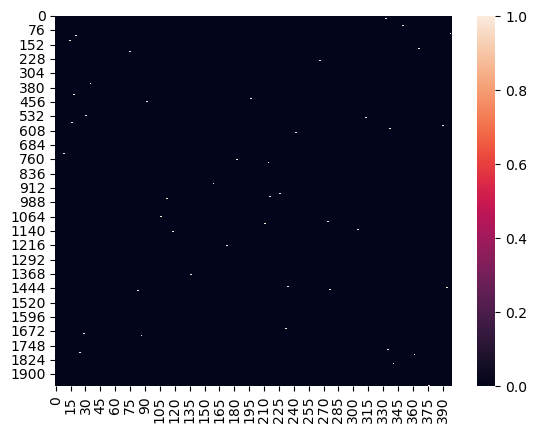

In [33]:
sns.heatmap(averaged_distance<50) #this is a contact map
number_connected_fascin=sum(sum((averaged_distance<50))>0) 
(averaged_distance<50).sum(axis=1).shape
number_connected_fascin

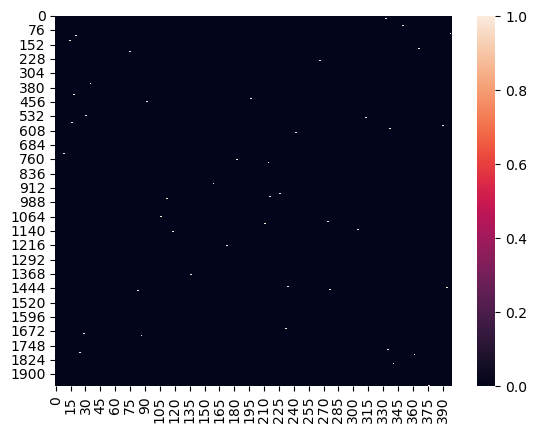

In [34]:
frame=df[df['frame']==df['frame'].max()]
actin=frame[frame['residue_names'].isin(['ACD','ACT']) & frame['names'].isin(['Aa','Ab','Ac'])] 
fascin=frame[frame['residue_names'].isin(['FAS']) & frame['names'].isin(['Ca','Cb','Cd'])]
aactinin=frame[frame['residue_names'].isin(['AAC']) & frame['names'].isin(['Ca','Cb','Cd'])]
xyz1=actin[['x','y','z']].values
xyz2=fascin[['x','y','z']].values
distance=sdist.cdist(xyz1,xyz2)
new_shape = (distance.shape[0] // 3, distance.shape[1] // 3)
reshaped_matrix = distance.reshape(new_shape[0], 3, new_shape[1], 3)

# Compute the average value along the specified axes
averaged_distance = reshaped_matrix.mean(axis=(1, 3))
sns.heatmap(averaged_distance<50)
number_connected_fascin=sum(sum((averaged_distance<50))>0)
#(averaged_distance<50).sum(axis=1).shape


In [146]:
# actin_filter = df['residue_names'].isin(['ACD', 'ACT']) & df['names'].isin(['Aa', 'Ab', 'Ac'])
# fascin_filter = df['residue_names'].isin(['FAS']) & df['names'].isin(['Ca', 'Cb', 'Cd'])
# aac_filter = df['residue_names'].isin(['AAC']) & df['names'].isin(['Ca', 'Cb', 'Cd'])

# # Apply the filters to the DataFrame
# actin_data = df[actin_filter]
# fascin_data = df[fascin_filter]
# aac_data = df[aac_filter]

# connected_fascin_counts = []

# Group the data by frame and perform computations for each frame
grouped_frames = df.groupby('frame')

df['actin_filter'] = df['residue_names'].isin(['ACD', 'ACT']) & df['names'].isin(['Aa', 'Ab', 'Ac'])
df['fascin_filter'] = df['residue_names'].isin(['FAS']) & df['names'].isin(['Ca', 'Cb', 'Cd'])
df['aac_filter'] = df['residue_names'].isin(['AAC']) & df['names'].isin(['Ca', 'Cb', 'Cd'])
connected_fascin_counts = []
connected_aac_counts = []

fascin_binding_data=[]
actinin_binding_data=[]

# Group the data by frame and perform computations for each frame
for frame_num, frame_group in df.groupby('frame'):
    if frame_num % 20 == 0:
        print(frame_num)
    actin_group = frame_group[frame_group['actin_filter']]
    fascin_group = frame_group[frame_group['fascin_filter']]
    aac_group = frame_group[frame_group['aac_filter']]
    #aac_group = aac_data[aac_data['frame'] == frame_num]
    
    xyz1 = actin_group[['x', 'y', 'z']].values
    xyz2 = fascin_group[['x', 'y', 'z']].values
    xyz3 = aac_group[['x','y','z']].values
    
    distance = sdist.cdist(xyz1, xyz2) 
    new_shape = (distance.shape[0] // 3, distance.shape[1] // 3)
    reshaped_matrix = distance.reshape(new_shape[0], 3, new_shape[1], 3)
    averaged_distance = reshaped_matrix.mean(axis=(1, 3))
    number_connected_fascin = sum(np.any(averaged_distance < 50, axis=0))
    connected_fascin_counts.append(number_connected_fascin)
    fascin_binding_heads=np.any(averaged_distance<50,axis=0).reshape(-1,2).sum(axis=1)
    fascin_binding_data+=[{'Fascin 2':(fascin_binding_heads==2).sum(),
                           'Fascin 1':(fascin_binding_heads==1).sum(),
                           'Fascin 0':(fascin_binding_heads==0).sum()}]
    
    
    distance_aac = sdist.cdist(xyz1, xyz3) 
    new_shape_aac = (distance_aac.shape[0] // 3, distance_aac.shape[1] // 3)
    reshaped_matrix_aac = distance_aac.reshape(new_shape_aac[0], 3, new_shape_aac[1], 3)
    averaged_distance_aac = reshaped_matrix_aac.mean(axis=(1, 3))
    number_connected_aac = sum(np.any(averaged_distance_aac < 50, axis=0))
    connected_aac_counts.append(number_connected_aac)
    np.any(averaged_distance<50,axis=0).reshape(-1,2).sum(axis=1)
    actinin_binding_heads=np.any(averaged_distance_aac<50,axis=0).reshape(-1,2).sum(axis=1)
    actinin_binding_data+=[{'Actinin 2':(actinin_binding_heads==2).sum(),
                            'Actinin 1':(actinin_binding_heads==1).sum(),
                            'Actinin 0':(actinin_binding_heads==0).sum()}]
    
fascin_binding_data = pd.DataFrame(fascin_binding_data)#,columns=['Fascin 2','Fascin 1','Fascin 0'])
actinin_binding_data = pd.DataFrame(actinin_binding_data)#,columns=['Actinin 2','Actinin 1','Actinin 0'])

0
20
40
60
80
100
120
140
160
180
200
220
240
260
280
300
320
340
360
380
400
420
440
460
480
500
520
540
560
580
600
620
640
660
680
700
720
740
760
780
800
820
840
860
880
900
920
940
960
980
1000
1020
1040
1060


<Axes: >

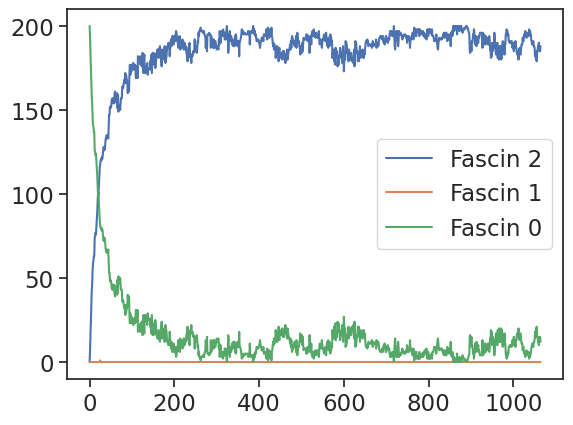

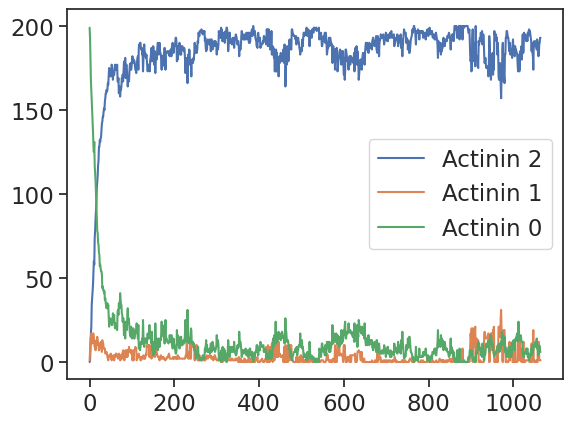

In [147]:
fascin_binding_data.plot()
actinin_binding_data.plot()

In [128]:
{2:(fascin_binding_heads==2).sum(),
 1:(fascin_binding_heads==1).sum(),
 0:(fascin_binding_heads==0).sum()}

{2: 190, 1: 0, 0: 10}

,0,1,2,3,4,5,6,7,8,9,...,390,391,392,393,394,395,396,397,398,399
0,4865.830107,4883.896889,4126.078052,4136.793583,4077.519128,4062.692476,4516.652833,4511.730558,4683.297936,4675.305673,...,1624.411987,1608.655196,5909.222142,5913.611278,3307.148091,3330.252198,4517.269861,4522.651555,2594.133365,2609.934363
1,4840.516771,4858.443189,4113.021546,4124.020965,4068.954943,4054.443326,4503.593453,4498.402367,4666.722498,4659.067028,...,1614.107723,1599.043638,5946.875828,5951.018867,3317.787457,3340.985812,4509.652957,4514.707768,2581.434506,2596.758704
2,4826.670069,4844.823177,4066.320173,4077.102399,4018.845587,4004.096433,4456.901683,4451.917392,4622.897189,4614.967261,...,1569.458587,1554.012742,5937.593256,5941.990700,3328.846322,3352.016635,4458.808182,4464.102660,2542.986289,2558.601037
3,4779.578648,4797.548894,4072.301049,4083.469471,4029.082993,4014.503509,4460.278325,4455.249722,4626.540427,4618.949409,...,1557.699760,1542.486391,6000.150857,6004.403580,3289.448119,3312.698181,4467.841595,4472.749246,2521.209332,2536.584845
4,4780.548278,4798.727715,4012.941605,4023.891269,3967.792769,3953.183845,4403.035612,4397.954855,4568.077117,4560.307523,...,1517.586183,1502.567793,5979.134476,5983.483668,3342.848213,3366.095933,4407.825509,4412.928969,2492.354705,2507.693841
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1955,4574.428666,4593.651472,917.296054,904.657527,963.179457,979.419488,581.538309,584.604284,536.820278,526.958080,...,3596.731660,3615.613376,8916.352535,8923.917993,6922.790990,6941.715348,551.281499,541.883206,3178.974564,3165.536040
1956,4539.969646,4559.005912,923.236013,912.081044,987.860482,1004.783776,569.587277,571.749952,507.078733,500.044603,...,3604.310509,3623.451563,8961.452130,8968.890146,6924.852078,6943.767951,583.866505,572.008732,3175.905010,3162.019520
1957,4581.476290,4600.547877,973.808359,961.741158,1023.481978,1039.605301,623.920696,627.574009,575.149688,567.222475,...,3649.288803,3668.205631,8976.654993,8984.233728,6964.604040,6983.446763,605.533535,595.630067,3220.375248,3206.750316
1958,4517.508627,4536.485046,960.148289,949.588942,1023.263288,1039.460791,587.639895,591.814776,553.223778,547.149147,...,3626.597978,3645.670492,9009.340664,9016.867151,6929.851910,6948.642722,603.962414,591.601986,3182.932538,3168.968002


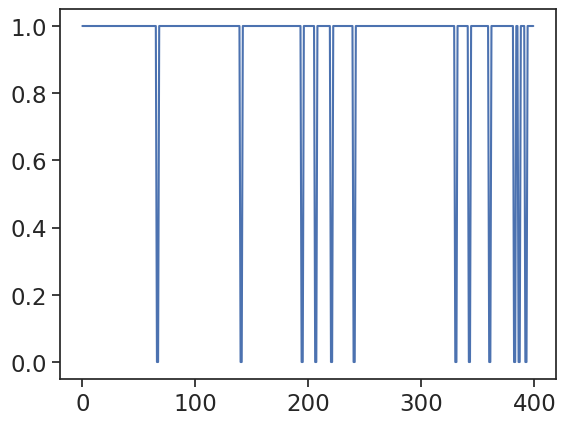

In [62]:
#plt.figure(figsize=(40,40))
#sns.heatmap(averaged_distance < 50)
plt.plot(np.any(averaged_distance < 50, axis=0))
pd.DataFrame(averaged_distance)

In [119]:
def count_contacts(averaged_distance):
    num_columns = averaged_distance.shape[1]
    num_contacts = num_columns // 2
    contacts = np.zeros(num_contacts)

    for i in range(num_contacts):
        start_col = 2 * i
        distances = averaged_distance[:, start_col:start_col + 2]
        num_close_contacts = np.sum(np.any(distances < 50, axis=0))
        contacts[i] = num_close_contacts

    return contacts

# Example usage:
# Assuming you have loaded your table into a numpy array called 'averaged_distance'
output = count_contacts(averaged_distance)
print(output)
    
    

[2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 0. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 0. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 0. 2. 2. 2. 2. 2. 0. 2. 2. 2. 2. 2. 2. 0. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 0. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 0. 2. 2.
 2. 2. 2. 0. 2. 2. 2. 2. 2. 2. 2. 2. 0. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 0.
 2. 0. 2. 2. 0. 2. 2. 2.]


In [114]:
np.any(averaged_distance<50,axis=0).reshape(-1,2).sum(axis=1)

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2,
       0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2,
       2, 2])

In [92]:
def count_contacts(averaged_distance):
    num_columns = averaged_distance.shape[1]
    num_contacts = num_columns // 2
    contacts = np.zeros(num_contacts)

    for i in range(num_contacts):
        start_col = 2 * i
        distances = averaged_distance[:, start_col:start_col + 2]
        num_close_contacts = np.sum(np.any(distances < 50, axis=1))
        contacts[i] = num_close_contacts

    return contacts

# Example usage:
# Assuming you have loaded your table into a numpy array called 'averaged_distance'
output = count_contacts(averaged_distance)
print(output)

ValueError: could not broadcast input array from shape (196000,) into shape (200,)

In [121]:
num_particles = averaged_distance.shape[0]
num_columns = averaged_distance.shape[1]
num_contacts = num_columns // 2
contacts = np.zeros(num_contacts)
range(num_contacts)
averaged_distance[:, 4:6].shape

for i in range(num_contacts):
    start_col = 2 * i
    distances = averaged_distance[:, start_col:start_col + 2]
    num_close_contacts = np.sum(np.any(distances < 50, axis=0))
    contacts[i] = num_close_contacts

contacts

array([2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 0.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 0., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 0., 2., 2., 2., 2.,
       2., 0., 2., 2., 2., 2., 2., 2., 0., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 0., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 0., 2., 2., 2., 2.,
       2., 0., 2., 2., 2., 2., 2., 2., 2., 2., 0., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 0., 2., 0., 2., 2., 0., 2., 2., 2.])

In [123]:
np.any(distances < 50, axis=1)

array([False, False, False, ..., False, False, False])

,0,1,2,3,4,5,6,7,8,9,...,390,391,392,393,394,395,396,397,398,399
0,4865.830107,4883.896889,4126.078052,4136.793583,4077.519128,4062.692476,4516.652833,4511.730558,4683.297936,4675.305673,...,1624.411987,1608.655196,5909.222142,5913.611278,3307.148091,3330.252198,4517.269861,4522.651555,2594.133365,2609.934363
1,4840.516771,4858.443189,4113.021546,4124.020965,4068.954943,4054.443326,4503.593453,4498.402367,4666.722498,4659.067028,...,1614.107723,1599.043638,5946.875828,5951.018867,3317.787457,3340.985812,4509.652957,4514.707768,2581.434506,2596.758704
2,4826.670069,4844.823177,4066.320173,4077.102399,4018.845587,4004.096433,4456.901683,4451.917392,4622.897189,4614.967261,...,1569.458587,1554.012742,5937.593256,5941.990700,3328.846322,3352.016635,4458.808182,4464.102660,2542.986289,2558.601037
3,4779.578648,4797.548894,4072.301049,4083.469471,4029.082993,4014.503509,4460.278325,4455.249722,4626.540427,4618.949409,...,1557.699760,1542.486391,6000.150857,6004.403580,3289.448119,3312.698181,4467.841595,4472.749246,2521.209332,2536.584845
4,4780.548278,4798.727715,4012.941605,4023.891269,3967.792769,3953.183845,4403.035612,4397.954855,4568.077117,4560.307523,...,1517.586183,1502.567793,5979.134476,5983.483668,3342.848213,3366.095933,4407.825509,4412.928969,2492.354705,2507.693841
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1955,4574.428666,4593.651472,917.296054,904.657527,963.179457,979.419488,581.538309,584.604284,536.820278,526.958080,...,3596.731660,3615.613376,8916.352535,8923.917993,6922.790990,6941.715348,551.281499,541.883206,3178.974564,3165.536040
1956,4539.969646,4559.005912,923.236013,912.081044,987.860482,1004.783776,569.587277,571.749952,507.078733,500.044603,...,3604.310509,3623.451563,8961.452130,8968.890146,6924.852078,6943.767951,583.866505,572.008732,3175.905010,3162.019520
1957,4581.476290,4600.547877,973.808359,961.741158,1023.481978,1039.605301,623.920696,627.574009,575.149688,567.222475,...,3649.288803,3668.205631,8976.654993,8984.233728,6964.604040,6983.446763,605.533535,595.630067,3220.375248,3206.750316
1958,4517.508627,4536.485046,960.148289,949.588942,1023.263288,1039.460791,587.639895,591.814776,553.223778,547.149147,...,3626.597978,3645.670492,9009.340664,9016.867151,6929.851910,6948.642722,603.962414,591.601986,3182.932538,3168.968002


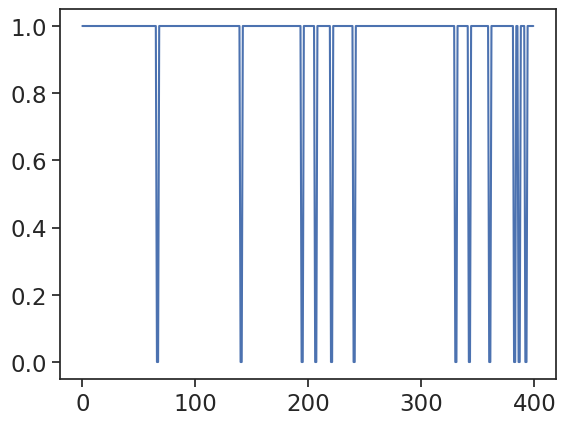

In [75]:
#plt.figure(figsize=(40,40))
#sns.heatmap(averaged_distance < 50)
plt.plot(np.any(averaged_distance < 50, axis=0))
pd.DataFrame(averaged_distance)

In [73]:
averaged_distance[1000]

array([ 6042.86141338,  6060.73773663,  3347.71992473,  3331.86688158,
        3254.42484822,  3256.66843679,  3029.75508297,  3045.56798679,
        3118.00956542,  3107.6654422 ,  8255.55398406,  8247.38817604,
        8035.43398102,  8040.88309271, 10929.50523098, 10934.05757053,
        5942.34219967,  5938.74524027,  6419.80110823,  6406.43580843,
       11466.6571346 , 11483.00930563,  2041.42490727,  2032.14242304,
        9381.16428997,  9363.95538982,  9020.67939959,  9024.20815705,
        6021.06141551,  6015.35358533,  6814.68254201,  6834.96202993,
        7674.17668434,  7658.26883078,  9285.0569199 ,  9299.79037656,
        6460.48053715,  6464.05100614,  9279.25035313,  9260.25420755,
        6876.08174511,  6884.52583142,  5777.77849572,  5800.8693192 ,
        7789.94043061,  7786.737103  ,  7930.41214978,  7912.32054651,
        1361.72086306,  1354.96904641,  5978.80205046,  5960.30966481,
        5502.04206891,  5485.61748442,  3966.49956711,  3953.02377494,
      

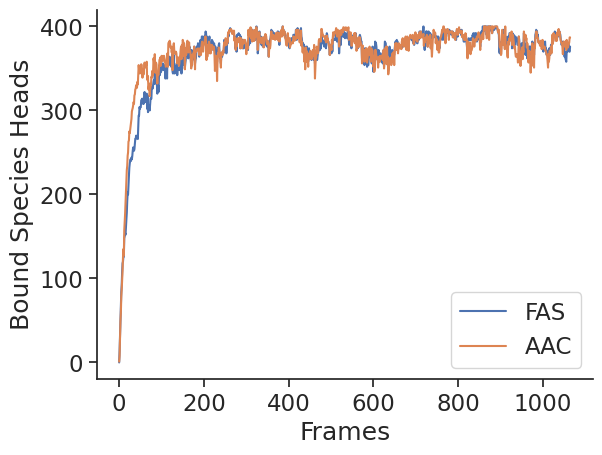

In [148]:
sns.set(style='ticks',font_scale=1.5)
plt.plot(connected_fascin_counts,label='FAS')
plt.plot(connected_aac_counts,label='AAC')
plt.legend()
plt.xlabel('Frames')
plt.ylabel('Bound Species Heads')
sns.despine()


<Axes: >

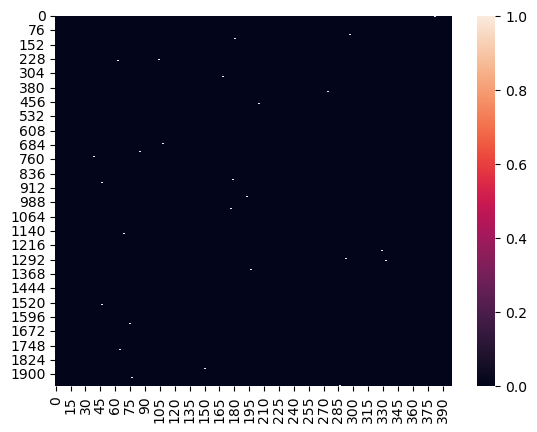

In [165]:
sns.heatmap(averaged_distance<50)